## Challenge Description
Company XYZ sells a software for 39. Since revenue has been flat for some time, the VP of Product has decided to run a test increasing the price. She hopes that this would increase revenue. In the experiment, 66\% of the users have seen the old price (\\$39), while a random sample of 33\% users a higher price (\$59).

The test has been running for some time and the VP of Product is interested in understanding how it went and whether it would make sense to increase the price for all the users. Especially she asked you the following questions:

Should the company sell its software for \\$39 or \\$59?

The VP of Product is interested in having a holistic view into user behavior, especially focusing on actionable insights that might increase conversion rate. What are your main findings looking at the data?

The VP of Product feels that the test has been running for too long and she should have been able to get statistically significant results in a shorter time. Do you agree with her intuition? After how many days would you have stopped the test? Please, explain why.



In [260]:
import pandas as pd
import numpy as np
from scipy import stats

# Bring in some plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt
alt.renderers.enable('notebook')

from datetime import datetime

In [261]:
df_test_results = pd.read_csv('../test_results.csv', index_col='user_id')
df_test_results = df_test_results.drop(['Unnamed: 0'], axis=1)

In [262]:
df_test_results.shape

(316800, 7)

In [263]:
user_table = pd.read_csv('../user_table.csv', index_col='user_id')

In [264]:
user_table.shape

(275616, 4)

In [265]:
df = df_test_results.join(user_table)

In [266]:
df.shape

(316800, 11)

In [267]:
df.head()

,timestamp,source,device,operative_system,test,price,converted,city,country,lat,long
user_id,,,,,,,,,,,
604839,2015-05-08 03:38:34,ads_facebook,mobile,iOS,0,39.0,0,Buffalo,USA,42.89,-78.86
624057,2015-05-10 21:08:46,seo-google,mobile,android,0,39.0,0,Lakeville,USA,44.68,-93.24
317970,2015-04-04 15:01:23,ads-bing,mobile,android,0,39.0,0,Parma,USA,41.38,-81.73
685636,2015-05-07 07:26:01,direct_traffic,mobile,iOS,1,59.0,0,Fayetteville,USA,35.07,-78.90
820854,2015-05-24 11:04:40,ads_facebook,web,mac,0,39.0,0,Fishers,USA,39.95,-86.02


In [268]:
df.describe()

,test,price,converted,lat,long
count,316800.000000,3.168000e+05,316800.000000,275616.000000,275616.000000
mean,0.360079,6.457590e+06,0.018333,37.111680,-93.981772
std,0.480024,6.797307e+07,0.134154,5.209627,18.086486
min,0.000000,3.900000e+01,0.000000,19.700000,-157.800000
25%,0.000000,3.900000e+01,0.000000,33.660000,-112.200000
50%,0.000000,3.900000e+01,0.000000,37.740000,-88.930000
75%,1.000000,5.900000e+01,0.000000,40.700000,-78.910000
max,1.000000,9.998843e+08,1.000000,61.180000,30.310000


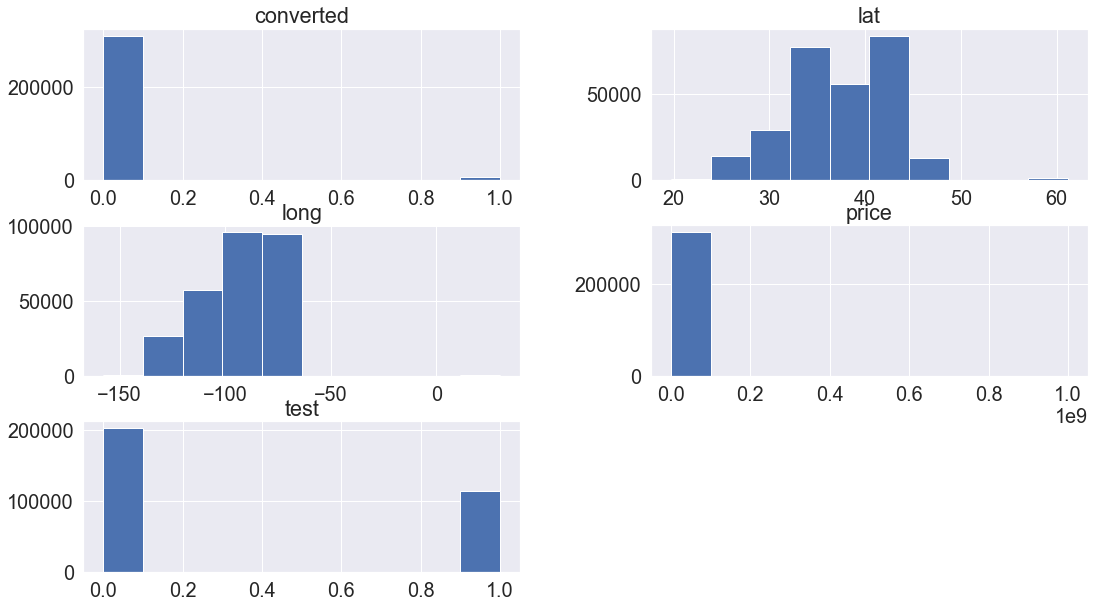

In [269]:
# Plot histograms to explore distributions
df.hist(figsize=(18,10))
plt.show()

The lat/longs are cool to look at - we even have customers in Hawaii (25 long) and in the norther reaches of the world, practically in the arctic circle (60 lat).

In [270]:
# Hoooboy, we got some issues with price values 
df.sort_values('price', ascending=False).head(10)

,timestamp,source,device,operative_system,test,price,converted,city,country,lat,long
user_id,,,,,,,,,,,
465205,2015-04-08 04:41:52,direct_traffic,mobile,iOS,0,999884279.0,0,Victoria,USA,28.82,-96.98
381904,2015-04-17 01:60:15,ads-google,web,windows,1,999762858.0,0,Virginia Beach,USA,36.74,-76.04
535876,2015-03-27 09:35:19,direct_traffic,mobile,iOS,0,999173836.0,0,Rochester,USA,43.17,-77.62
461806,2015-04-30 20:18:16,seo_facebook,mobile,iOS,0,999139431.0,0,Roseville,USA,42.51,-82.94
765779,2015-05-03 16:40:38,ads-google,mobile,iOS,1,998765098.0,0,New York,USA,40.67,-73.94
124156,2015-04-11 10:13:26,seo-google,mobile,NaN,0,998462170.0,0,Southaven,USA,34.97,-90.00
411153,2015-03-14 00:18:40,seo-yahoo,mobile,iOS,1,997796945.0,0,Stamford,USA,41.10,-73.55
898447,2015-04-02 12:48:42,seo-google,mobile,iOS,0,997608888.0,0,NaN,NaN,NaN,NaN
276336,2015-05-22 11:52:40,friend_referral,mobile,NaN,0,997482836.0,0,Mobile,USA,30.68,-88.09


In [271]:
# Drop them crazy prices
df = df[(df['price'] <= 59)]

In [272]:
df.describe()

,test,price,converted,lat,long
count,313726.000000,313726.000000,313726.000000,272941.000000,272941.000000
mean,0.359945,46.202400,0.018325,37.112528,-93.978757
std,0.479985,9.600715,0.134124,5.209501,18.087077
min,0.000000,39.000000,0.000000,19.700000,-157.800000
25%,0.000000,39.000000,0.000000,33.660000,-112.200000
50%,0.000000,39.000000,0.000000,37.740000,-88.930000
75%,1.000000,59.000000,0.000000,40.700000,-78.910000
max,1.000000,59.000000,1.000000,61.180000,30.310000


In [273]:
# It appears the user table is incomplete, which might be problematic
# in limiting findings to geographic locations to a certain extent
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 313726 entries, 604839 to 832372
Data columns (total 11 columns):
timestamp           313396 non-null object
source              313417 non-null object
device              313726 non-null object
operative_system    293607 non-null object
test                313726 non-null int64
price               313726 non-null float64
converted           313726 non-null int64
city                272941 non-null object
country             272941 non-null object
lat                 272941 non-null float64
long                272941 non-null float64
dtypes: float64(3), int64(2), object(6)
memory usage: 28.7+ MB


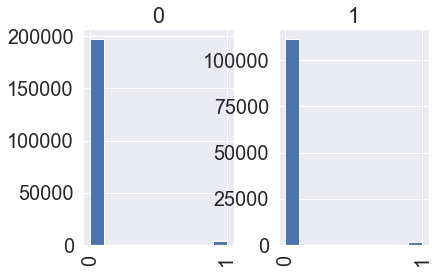

In [274]:
df['converted'].hist(by=df['test'])
plt.show()

In [275]:
df.groupby('test')['converted'].describe()

,count,mean,std,min,25%,50%,75%,max
test,,,,,,,,
0,200802.0,0.019890,0.139623,0.0,0.0,0.0,0.0,1.0
1,112924.0,0.015541,0.123693,0.0,0.0,0.0,0.0,1.0


Ok, looks like those in the lower price group (0) on average purchased the product 1.99% of the time while those in the higher price group (1) purchased the product on average 1.55% of the time. This is likely a significant difference. 

In [276]:
contingency_table = pd.crosstab(
    df['test'],
    df['converted'],
    margins = True
)
contingency_table

converted,0,1,All
test,,,
0,196808,3994,200802
1,111169,1755,112924
All,307977,5749,313726


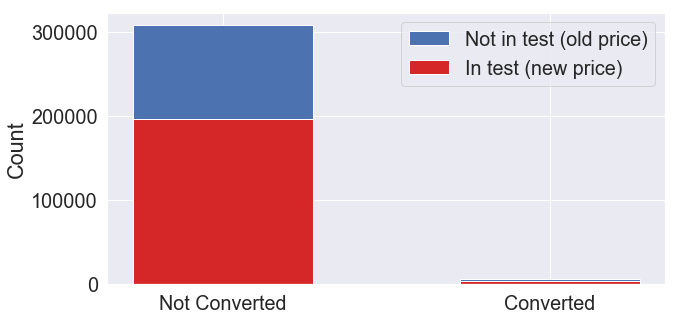

In [277]:
#Assigns the frequency values
no_test = contingency_table.iloc[0][0:2].values
yes_test = contingency_table.iloc[1][0:2].values

#Plots the bar chart
fig = plt.figure(figsize=(10, 5))
sns.set(font_scale=1.8)
categories = ["Not Converted","Converted"]
p1 = plt.bar(categories, no_test, 0.55, color='#d62728')
p2 = plt.bar(categories, yes_test, 0.55, bottom=no_test)
plt.legend((p2[0], p1[0]), ('Not in test (old price)', 'In test (new price)'))
plt.ylabel('Count')
plt.show()

In [278]:
f_obs = np.array([contingency_table.iloc[0][0:3].values,
                  contingency_table.iloc[1][0:3].values])
f_obs

array([[196808,   3994, 200802],
       [111169,   1755, 112924]])

In [279]:
# Chi-square, p-value, degrees of freedom
stats.chi2_contingency(f_obs)[0:3]

(75.9864022316836, 3.1605481098978044e-17, 2)

With a p-value < 0.05 , I can reject the null hypothesis. There is definitely some sort of relationship between 'converted' and the 'test' column. I don't yet know what this relationship is, but I do know that these two variables are not independent of each other.

In [280]:
# Checking price per conversion rate
print("Revenue from old price based on old conversion rate ${}".format(round(len(df) * 0.019890 * 39)))
print("Revenue from new price based on new conversion rate ${}".format(round(len(df) * 0.015541 * 59)))
print("Difference between revenue at old model is an increase of {}%".format(round(250265/211723*100)))

Revenue from old price based on old conversion rate $243360
Revenue from new price based on new conversion rate $287661
Difference between revenue at old model is an increase of 118%


## Searching for conversion trends

### Trends by geographic location

In [281]:
import geopandas as gpd
from shapely.geometry import Point, Polygon



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


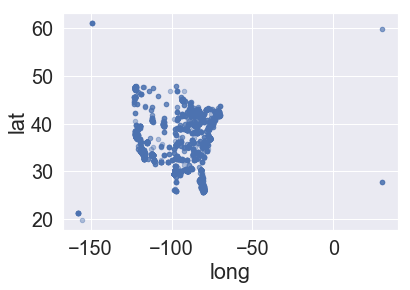

In [282]:
converted.plot(kind="scatter", x="long", y="lat", alpha=0.4)
plt.show()

In [286]:
# City conversion rate
city_conversion = df.groupby(['test','city'])['converted'].mean().reset_index()

df_conversion = city_conversion.merge(df, on='city')

In [290]:
df_conversion_filtered.head()

,test_x,city,converted_x,timestamp,source,device,operative_system,test_y,price,converted_y,country,lat,long
0,0,Abilene,0.025271,2015-03-27 18:22:51,seo-other,mobile,android,1,59.0,0,USA,32.45,-99.74
1,0,Abilene,0.025271,2015-03-21 14:23:53,seo-google,mobile,iOS,1,59.0,0,USA,32.45,-99.74
2,0,Abilene,0.025271,2015-03-27 07:39:21,seo_facebook,mobile,NaN,0,39.0,0,USA,32.45,-99.74
3,0,Abilene,0.025271,2015-05-23 13:01:41,ads-google,web,windows,0,39.0,0,USA,32.45,-99.74
4,0,Abilene,0.025271,2015-05-09 01:14:18,ads-bing,web,mac,1,59.0,0,USA,32.45,-99.74


In [288]:
# Filter out outlier cities
df_conversion_filtered = df_conversion.loc[(df_conversion['lat'] < 50) & (df_conversion['lat'] > 21) & 
                                           (df_conversion['long'] < -50) & (df_conversion['long'] > -145)]


No handles with labels found to put in legend.


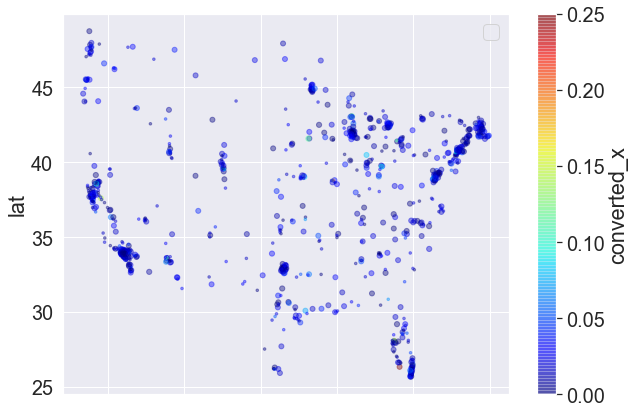

In [292]:
df_conversion_filtered.drop_duplicates(['city']).plot(kind="scatter", x="long", y="lat",
    s=df_conversion_filtered['converted_x']*1000,
    c="converted_x", cmap=plt.get_cmap("jet"),
    colorbar=True, alpha=0.4, figsize=(10,7),
)
plt.legend()
plt.show()

In [295]:
df_conversion_filtered_old = df_conversion_filtered.loc[df_conversion_filtered['test_x'] == 0]
df_conversion_filtered_new = df_conversion_filtered.loc[df_conversion_filtered['test_x'] == 1]

Looks like this is simply a population heatmap for the most part, but it does show a few cities with a higher conversion rate

No handles with labels found to put in legend.


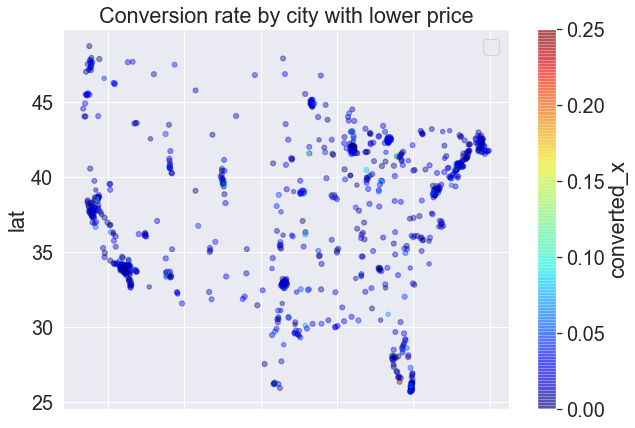

In [298]:
df_conversion_filtered_old.drop_duplicates(['city']).plot(kind="scatter", x="long", y="lat",
    s=df_conversion_filtered_old['converted_x']*1000,
    c="converted_x", cmap=plt.get_cmap("jet"),
    colorbar=True, alpha=0.4, figsize=(10,7),
)
plt.title('Conversion rate by city with lower price')
plt.legend()
plt.show()

No handles with labels found to put in legend.


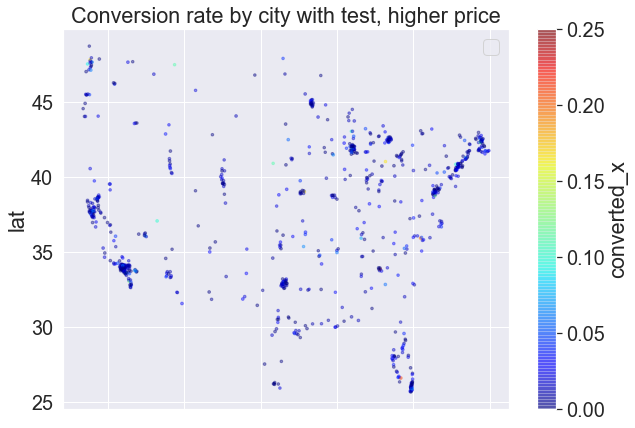

In [299]:
df_conversion_filtered_new.drop_duplicates(['city']).plot(kind="scatter", x="long", y="lat",
    s=df_conversion_filtered_new['converted_x']*1000,
    c="converted_x", cmap=plt.get_cmap("jet"),
    colorbar=True, alpha=0.4, figsize=(10,7),
)
plt.title('Conversion rate by city with test, higher price')
plt.legend()
plt.show()

Certainly, there are fewer data points for the higher, test price of \\$59, but it does appear that there are certain cities that seem to have a higher conversion rate with the new price compared to the old. It would make sense, as a result, to work with marketing on running some kinds of campaigns in those cities to see if this trend plays out or is a function of noise in the data. 

### Trends by source/ad-buys

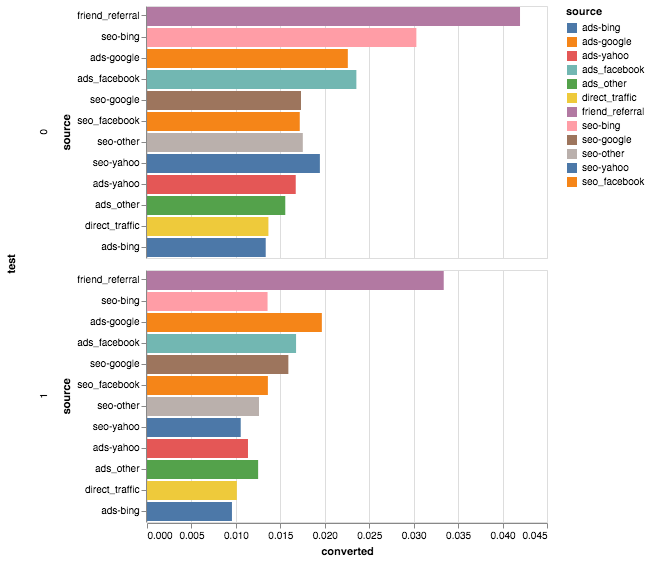

In [300]:

source = df.groupby(['source', 'test'])['converted'].mean().reset_index()

alt.Chart(source).mark_bar().encode(
    x='converted',
    color='source',
    row='test',
    y=alt.Y(
        'source',
        sort=alt.EncodingSortField(
            field="converted",  # The field to use for the sort
            op="sum",  # The operation to run on the field prior to sorting
            order="descending",  # The order to sort in
        )    
    )
)

Might need to readjust the marketing strategy if the new price is chosen. Looks like there are across the board reductions in conversion as expected, but certain ad-buys appear to suffer greatly from the new price. In particular, Bing and Yahoo seo drop off significantly. It would make sense to check the statistical significance of the drops in conversion rates by ad source via an anova for example to determine which ad sources to place primary focus on if the new pricing model is chosen. 

## Looking at time of experiment

In [402]:
# Need to pay attention to the time value
df_clean = df.dropna()

# Remove the problematic time values with 60 as minuts or seconds
df_clean = df_clean.loc[df_clean['timestamp'].str[-2:] != '60'] # seconds
df_clean = df_clean.loc[df_clean['timestamp'].str[-5:-3] != '60'] # minutes

# Many years are messed up as well, starting with 2815 instead of 2015
df_clean = df_clean.loc[df_clean['timestamp'].str[0:2] != '28'] # years

# Convert to datetime
df_clean['timestamp'] = pd.to_datetime(df_clean['timestamp'])

In [420]:
(df_clean['timestamp'] < '2015-06-30').sum()

246304

And I ran out of time here. Tricky business on getting the time series stuff working, that is out of my wheelhouse and clearly an area where I need some practice. 